In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fraud-data/sample_submission.csv
/kaggle/input/fraud-data/test_identity.csv
/kaggle/input/fraud-data/train_identity.csv
/kaggle/input/fraud-data/test_transaction.csv
/kaggle/input/fraud-data/train_transaction.csv


In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.expand_frame_repr', False)

# IMPORTS

In [3]:
!pip install dagshub mlflow -q

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 260.1/260.1 kB 7.8 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 28.2/28.2 MB 54.0 MB/s eta 0:00:00:00:0100:01
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6.1/6.1 MB 64.4 MB/s eta 0:00:00:00:0100:01
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 114.9/114.9 kB 5.8 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 85.0/85.0 kB 4.6 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 692.3/692.3 kB 31.2 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î

In [4]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.base import clone
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GroupShuffleSplit
from sklearn.utils import resample
import shap
import dagshub
from sklearn.base import clone as sk_clone
from sklearn.tree import DecisionTreeClassifier

In [5]:
dagshub.init(repo_owner='gkuch22', repo_name='ml-hw2-gkuch22', mlflow=True)

‚ùó‚ùó‚ùó AUTHORIZATION REQUIRED ‚ùó‚ùó‚ùó

Output()



Open the following link in your browser to authorize the client:
https://dagshub.com/login/oauth/authorize?state=208438a5-4315-49e2-a976-aca7fd8cb72b&client_id=32b60ba385aa7cecf24046d8195a71c07dd345d9657977863b52e7748e0f0f28&middleman_request_id=8296e7fecffaab4ba2656114cfab3ef52620f476369da866688fe4ea04576a9b




Accessing as gkuch22

Initialized MLflow to track repo "gkuch22/ml-hw2-gkuch22"

Repository gkuch22/ml-hw2-gkuch22 initialized!

# DATA INSPECTION

In [6]:
df_transaction = pd.read_csv('/kaggle/input/fraud-data/train_transaction.csv')
df_identity = pd.read_csv('/kaggle/input/fraud-data/train_identity.csv')
df_transaction.shape, df_identity.shape

((590540, 394), (144233, 41))

# DATA MERGE

In [7]:
df_transaction['key_id'] = (
    df_transaction['card1'].astype(str) + '_' +
    df_transaction['addr1'].astype(str) + '_' +
    df_transaction['P_emaildomain'].astype(str)
)
df = df_transaction.merge(df_identity, how='left', on='TransactionID')

In [8]:
df.shape

(590540, 435)

In [9]:
df['key_id'].nunique()

90375

# UNDER SAMPLING

In [10]:
df.shape

(590540, 435)

In [11]:
fraud_df = df[df['isFraud'] == 1]
non_fraud_df = df[df['isFraud'] == 0]

non_fraud_undersampled = resample(non_fraud_df, replace=False, n_samples=3*len(fraud_df), random_state=42)

df_undersampled = pd.concat([fraud_df, non_fraud_undersampled])

df = df_undersampled.sample(frac=1, random_state=42).reset_index(drop=True)

In [12]:
fraud_df.shape

(20663, 435)

In [13]:
df.shape

(82652, 435)

# DATA SPLIT

In [14]:
gss1 = GroupShuffleSplit(n_splits=1, train_size=0.8, random_state=42)
train_valid_idx, test_idx = next(gss1.split(df, groups=df['key_id']))

train_valid_df = df.iloc[train_valid_idx]
test_df = df.iloc[test_idx]

gss2 = GroupShuffleSplit(n_splits=1, train_size=0.75, random_state=42)
train_idx, valid_idx = next(gss2.split(train_valid_df, groups=train_valid_df['key_id']))

train_df = train_valid_df.iloc[train_idx]
valid_df = train_valid_df.iloc[valid_idx]

X_train = train_df.drop(columns='isFraud')
y_train = train_df['isFraud']

X_valid = valid_df.drop(columns='isFraud')
y_valid = valid_df['isFraud']

X_test = test_df.drop(columns='isFraud')
y_test = test_df['isFraud']

In [15]:
X_train.shape, X_valid.shape, X_test.shape

((48455, 434), (17381, 434), (16816, 434))

In [16]:
X_train

invalid value encountered in greater
invalid value encountered in less
invalid value encountered in greater


TransactionID  TransactionDT  TransactionAmt ProductCD  card1  card2  card3       card4  card5   card6  addr1  addr2  dist1  dist2 P_emaildomain R_emaildomain     C1     C2   C3    C4    C5    C6    C7    C8    C9   C10   C11   C12    C13   C14     D1     D2     D3     D4     D5   D6   D7          D8        D9    D10    D11  D12  D13  D14    D15   M1   M2   M3   M4   M5   M6   M7   M8   M9   V1   V2   V3   V4   V5   V6   V7   V8   V9  V10  V11  V12  V13  V14  V15  V16  V17  V18  V19  V20  V21  V22  V23  V24  V25  V26  V27  V28  V29  V30  V31  V32  V33  V34  V35  V36  V37  V38  V39  V40  V41  V42  V43  V44  V45  V46  V47  V48  V49  V50  V51  V52  V53  V54  V55  V56  V57  V58  V59  V60  V61  V62  V63  V64  V65  V66  V67  V68  V69  V70  V71  V72  V73  V74  V75  V76  V77  V78  V79  V80  V81  V82  V83  V84  V85  V86  V87  V88  V89  V90  V91  V92  V93  V94  V95  V96  V97  V98  V99  V100  V101  V102  V103  V104  V105  V106  V107  V108  V109  V110  V111  V112  V113  V114  V115  V116  V117  V118  V119  V120  V121  V122  V123  V124  V125  V126        V127  V128  V129        V130  V131  V132  V133  V134  V135  V136  V137  V138  V139  V140  V141  V142  V143  V144  V145  V146  V147  V148  V149  V150  V151  V152  V153  V154  V155  V156  V157  V158   V159          V160  V161  V162  V163  V164    V165  V166  V167  V168  V169  V170  V171  V172  V173  V174  V175  V176  V177  V178  V179  V180  V181  V182  V183  V184  V185  V186  V187  V188  V189  V190  V191  V192  V193  V194  V195  V196  V197  V198  V199  V200  V201        V202         V203         V204  V205  V206  V207  V208  V209  V210        V211         V212         V213  V214  V215  V216  V217  V218  V219  V220  V221  V222  V223  V224  V225  V226  V227  V228  V229  V230  V231  V232  V233  V234  V235  V236  V237  V238  V239  V240  V241  V242  V243  V244  V245  V246  V247  V248  V249  V250  V251  V252  V253  V254  V255  V256  V257  V258  V259  V260  V261  V262        V263        V264        V265  V266  V267  V268  V269  V270  V271  V272        V273        V274        V275  V276  V277  V278  V279  V280  V281  V282  V283  V284  V285  V286  V287  V288  V289  V290  V291  V292  V293  V294  V295  V296  V297  V298  V299  V300  V301  V302  V303  V304  V305        V306        V307        V308  V309        V310  V311        V312        V313        V314        V315  V316        V317        V318        V319        V320        V321  V322  V323  V324  V325  V326  V327  V328  V329  V330  V331  V332  V333  V334  V335  V336  V337  V338  V339                  key_id  id_01     id_02  id_03  id_04  id_05  id_06  id_07  id_08  id_09  id_10  id_11     id_12  id_13  id_14  id_15     id_16  id_17  id_18  id_19  id_20  id_21  id_22 id_23  id_24  id_25  id_26 id_27  id_28     id_29      id_30                    id_31  id_32     id_33           id_34 id_35 id_36 id_37 id_38 DeviceType                   DeviceInfo
2            3268454        6875600         117.000         W   9592  532.0  150.0  mastercard  224.0   debit  143.0   87.0    NaN    NaN   hotmail.com           NaN    1.0    2.0  0.0   0.0   0.0   1.0   0.0   0.0   1.0   0.0   2.0   0.0    8.0   1.0  524.0  524.0  175.0  524.0  175.0  NaN  NaN         NaN       NaN  210.0    NaN  NaN  NaN  NaN  454.0  NaN  NaN  NaN   M0    F    F  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  1.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   0.0    0.000000   0.0   0.0    0.000000   0.0   0.0   0.0   0.0   0.0   

# DATA CLEANING

In [17]:
class CustomNuniqueHandlerClass(BaseEstimator, TransformerMixin):
    def __init__(self, threshold=1):
        self.threshold = threshold
        self.drop_cols = []
        
    def fit(self, X, y):
        for col in X.columns:
            value_counts = X[col].value_counts(normalize=True)
            
            if value_counts.iloc[0] > self.threshold:
                self.drop_cols.append(col)

        return self
    
    def transform(self, X):
        cols_to_drop = [col for col in self.drop_cols if col in X.columns]
        return X.drop(columns=cols_to_drop)
    

In [18]:
class CustomMajorNanHandlerClass(BaseEstimator, TransformerMixin):
    def __init__(self, threshold=0.8):
        self.threshold = threshold
        self.drop_cols = []

    def fit(self, X, y):
        self.drop_cols = [col for col in X.columns if X[col].isna().mean() > self.threshold]
        return self
    
    def transform(self, X):
        cols_to_drop = [col for col in self.drop_cols if col in X.columns]
        return X.drop(columns=cols_to_drop)

In [19]:
cleaning_pipeline = Pipeline(steps=[
    ('nunique_handler', CustomNuniqueHandlerClass(threshold=0.9)),
    ('nan_handler', CustomMajorNanHandlerClass(threshold=0.9))
])

In [20]:
X_cleaned = cleaning_pipeline.fit_transform(X_train, y_train)

In [21]:
print("before:", X_train.shape)
print("after:", X_cleaned.shape)

before: (48455, 434)
after: (48455, 311)


In [22]:
# experiment_name = "Decision_Tree_Training"
# run_name = "Decision_Tree_Cleaning"

# import mlflow

# mlflow.set_experiment(experiment_name)

# with mlflow.start_run(run_name=run_name):

#     mlflow.log_param("nunique_threshold", 0.9)
#     mlflow.log_param("nan_threshold", 0.9)
    
#     cleaning_pipeline.fit(X_train, y_train)

#     mlflow.sklearn.log_model(cleaning_pipeline, "cleaning_pipeline")

# DATA ENGINEERING

In [23]:
class CustomCategoricalEncoderClass(BaseEstimator, TransformerMixin):
    def __init__(self, threshold, encoder):
        self.threshold = threshold
        self.encoder = encoder
        self.cols = []
    
    def fit(self, X, y):
        self._encoder = clone(self.encoder)

        self.cols = [col for col in X.columns if X[col].dtype == 'object' and X[col].nunique() <= self.threshold]

        if self.cols:
            self._encoder.fit(X[self.cols])
        
        return self
    
    def transform(self, X):
        X = X.copy()
                
        if not self.cols:
            return X

        encoded = self._encoder.transform(X[self.cols])
        encoded_df = pd.DataFrame(
            encoded,
            index=X.index,
            columns=self._encoder.get_feature_names_out(self.cols)
        )
        
        X = X.drop(columns=self.cols)
        return pd.concat([X, encoded_df], axis=1)


In [24]:
class CustomWoeEncoderClass(BaseEstimator, TransformerMixin):
    def __init__(self, target_col):
        self.target_col = target_col
        self.cat_columns = []
        self.woe_mappings = {}
        
    def fit(self, X, y):
        df = X.copy()
        df[self.target_col] = y

        self.cat_columns = [col for col in df.columns if df[col].dtype == 'object']

        for col in self.cat_columns:
            groups = df.groupby([col])[self.target_col].agg(['count', 'sum'])
            groups.columns = ['n_obs', 'n_pos']
            groups['n_neg'] = groups['n_obs'] - groups['n_pos']
            
            groups['prop_pos'] = groups['n_pos'] / groups['n_pos'].sum()
            groups['prop_neg'] = groups['n_neg'] / groups['n_neg'].sum()
            
            with np.errstate(divide='ignore', invalid='ignore'):
                groups['woe'] = np.log(groups['prop_pos'] / groups['prop_neg'])
            
            groups.replace([np.inf, -np.inf], 0, inplace=True)
            groups.fillna(0, inplace=True)
            
            woe_dict = groups['woe'].to_dict()
            
            self.woe_mappings[col] = woe_dict
                    
        return self
        
    
    def transform(self, X):
        df = X.copy()
        for col in self.cat_columns:
            mapping = self.woe_mappings.get(col)
            df[f"{col}_woe"] = df[col].map(mapping).fillna(0)
        return df.drop(columns=[col for col in self.cat_columns if col in df.columns], errors='ignore')
    

In [25]:
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

engineering_pipeline = Pipeline(steps=[
    ('onehot_encoder', CustomCategoricalEncoderClass(threshold=5, encoder=encoder)),
    ('woe_encoder', CustomWoeEncoderClass('isFraud')),
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [26]:
X_engineered = engineering_pipeline.fit_transform(X_cleaned, y_train)
print("before:", X_cleaned.shape)
print("after:", X_engineered.shape)

before: (48455, 311)
after: (48455, 363)


In [27]:
# experiment_name = "Decision_Tree_Training"
# run_name = "Decision_Tree_Engineering"

# import mlflow

# mlflow.set_experiment(experiment_name)

# with mlflow.start_run(run_name=run_name):

#     mlflow.log_param("categorical_threshold", 5)
#     mlflow.log_param("onehot_encoder", "OneHotEncoder")
#     mlflow.log_param("woe_encoder", "WoeEncoder")
#     mlflow.log_param("imputer_strategy", "mean")
#     mlflow.log_param("scaler", "standard")
    
#     engineering_pipeline.fit(X_train, y_train)

#     mlflow.sklearn.log_model(engineering_pipeline, "engineering_pipeline")

# TRAINING

In [43]:
import mlflow
from sklearn.base import clone as sk_clone
from sklearn.tree import DecisionTreeClassifier
from itertools import product

logged_model = 'runs:/582efd80ff784537ac9bb1899d586167/cleaning_pipeline'
cleaning = mlflow.sklearn.load_model(logged_model)

logged_model = 'runs:/f5cd3ddfd3424719967852382ccce82c/engineering_pipeline'
engineering = mlflow.sklearn.load_model(logged_model)

nunique_thresholds = [0.8]
nan_thresholds = [0.8]
onehot_thresholds = [4]
imputers = ['mean']
scalers = {'standard': StandardScaler()}

max_depths = [8]
min_samples_splits = [7]
criterions = ['gini', 'entropy']

best_pipeline = None
best_roc_auc = 0
best_params = None

for uniquet in nunique_thresholds:
    for nant in nan_thresholds:
        for oht in onehot_thresholds:
            for imputer in imputers:
                for scaler_name, scaler in scalers.items():
                    for md, mss, crit in product(max_depths, min_samples_splits, criterions):
                        print()
                        print(f'uniquet={uniquet}, nt={nant}, oht={oht}, imputer={imputer}, scaler={scaler_name}')
                        print(f'md={md}, mss={mss}, crit={crit}')
                        
                        cleaning_pipeline = sk_clone(cleaning)
                        engineering_pipeline = sk_clone(engineering)
                        
                        cleaning_pipeline.named_steps['nunique_handler'].threshold = uniquet
                        cleaning_pipeline.named_steps['nan_handler'].threshold = nant
    
                        engineering_pipeline.named_steps['onehot_encoder'].threshold = oht
                        engineering_pipeline.named_steps['imputer'].strategy = imputer

                        model = DecisionTreeClassifier(max_depth=md, min_samples_split=mss,
                                                      criterion=crit, random_state=42) 
                        
                        pipeline = Pipeline(steps=[
                            ('cleaning', cleaning_pipeline),
                            ('engineering', engineering_pipeline),
                            ('model', model)
                        ])
                        
                        pipeline.fit(X_train, y_train)
                        
                        y_train_pred = pipeline.predict(X_train)
                        y_train_prob = pipeline.predict_proba(X_train)[:, 1]
                        
                        train_roc_auc = roc_auc_score(y_train, y_train_prob)
                        train_f1 = f1_score(y_train, y_train_pred)
                        print("TRAIN")
                        print(f"ROC AUC Score: {train_roc_auc}")
                        print(f"F1 Score: {train_f1}")
                        
                        
                        y_valid_pred = pipeline.predict(X_valid)
                        y_valid_prob = pipeline.predict_proba(X_valid)[:, 1]
                        
                        valid_roc_auc = roc_auc_score(y_valid, y_valid_prob)
                        valid_f1 = f1_score(y_valid, y_valid_pred)
                        print("VALID")
                        print(f"ROC AUC Score: {valid_roc_auc}")
                        print(f"F1 Score: {valid_f1}")
    
                        if valid_roc_auc > best_roc_auc:
                            best_roc_auc = valid_roc_auc
                            best_pipeline = pipeline
                            best_params = (uniquet, nant, oht, imputer, scaler_name, md, mss, crit)

print()
print("-------------------------")
print("TEST")
print("best params:", best_params)
y_test_pred = best_pipeline.predict(X_test)
y_test_prob = best_pipeline.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_test_prob)
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

print(f"ROC AUC Score: {roc_auc}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")



uniquet=0.8, nt=0.8, oht=4, imputer=mean, scaler=standard
md=8, mss=7, crit=gini
TRAIN
ROC AUC Score: 0.8953793176948288
F1 Score: 0.7268085106382979
VALID
ROC AUC Score: 0.80296174571426
F1 Score: 0.5388429752066116

uniquet=0.8, nt=0.8, oht=4, imputer=mean, scaler=standard
md=8, mss=7, crit=entropy
TRAIN
ROC AUC Score: 0.9025731266180339
F1 Score: 0.7285707486554662
VALID
ROC AUC Score: 0.798831903496279
F1 Score: 0.5192192192192192

-------------------------
TEST
best params: (0.8, 0.8, 4, 'mean', 'standard', 8, 7, 'gini')
ROC AUC Score: 0.8231356254126903
Accuracy: 0.8393196955280685
Precision: 0.902334444973797
Recall: 0.43133682532452744
F1 Score: 0.5836671802773498


# ANALYSIS

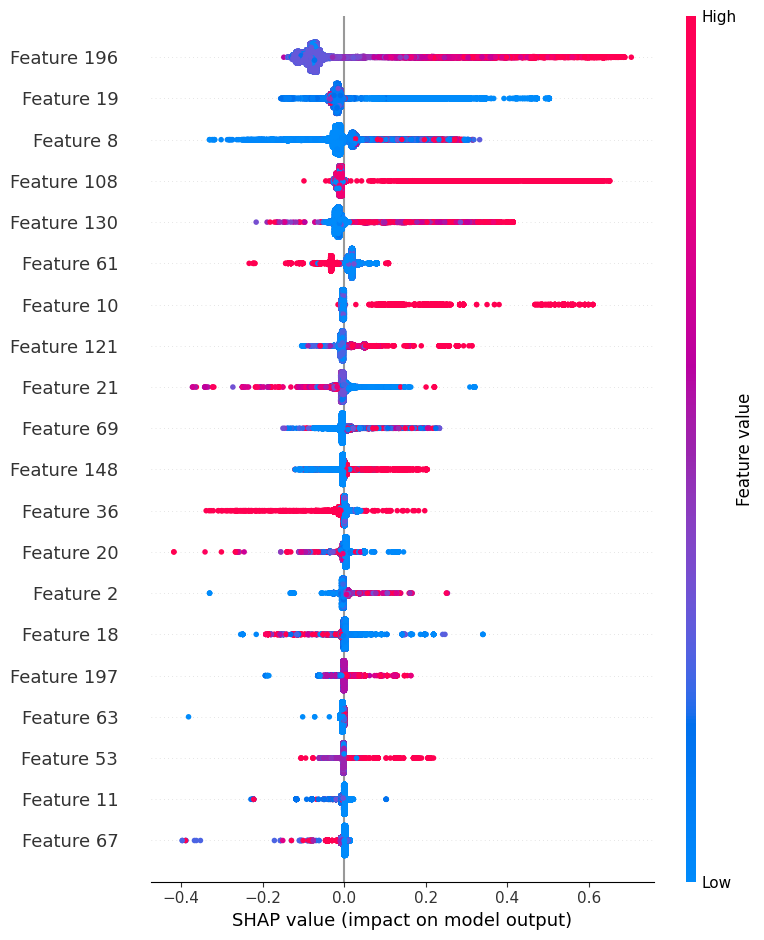

In [44]:
model = best_pipeline.named_steps['model']
X_train_transformed = best_pipeline[:-1].transform(X_train)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train_transformed)
shap.summary_plot(shap_values[1], X_train_transformed)

# MLFLOW TRACKING

In [ ]:
# !pip install dagshub mlflow

In [76]:
# import dagshub
# dagshub.init(repo_owner='gkuch22', repo_name='ml-hw2-gkuch22', mlflow=True)

‚ùó‚ùó‚ùó AUTHORIZATION REQUIRED ‚ùó‚ùó‚ùó

Output()



Open the following link in your browser to authorize the client:
https://dagshub.com/login/oauth/authorize?state=2d115990-9458-44e2-8a07-33c72d137ea2&client_id=32b60ba385aa7cecf24046d8195a71c07dd345d9657977863b52e7748e0f0f28&middleman_request_id=04259f1de3ef7274bc067ef2b9b01f458972ab79864d7e723c0725f8d9c05f58




Accessing as gkuch22

Initialized MLflow to track repo "gkuch22/ml-hw2-gkuch22"

Repository gkuch22/ml-hw2-gkuch22 initialized!

In [39]:
experiment_name = "Decision_Tree_Training"
run_name = "Decision_Tree_Changed_HyperParameters"

In [40]:
import mlflow

mlflow.set_experiment(experiment_name)

with mlflow.start_run(run_name=run_name):

    mlflow.log_param("nunique_threshold", 0,8)
    mlflow.log_param("nan_threshold", 0.8)
    mlflow.log_param("categorical_threshold", 4)
    mlflow.log_param("a_encoder", "OneHotEncoder")
    mlflow.log_param("b_encoder", "WoeEncoder")
    mlflow.log_param("imputer_strategy", "mean")
    mlflow.log_param("scaler", "standard")
    
    mlflow.log_param("max_depth", 8)
    mlflow.log_param("min_samples_split", 7)
    mlflow.log_param("criterion", "gini")
    
    mlflow.log_param("model_type", "DecisionTree")
    
    logged_model = 'runs:/582efd80ff784537ac9bb1899d586167/cleaning_pipeline'
    cleaning = mlflow.sklearn.load_model(logged_model)
    
    logged_model = 'runs:/f5cd3ddfd3424719967852382ccce82c/engineering_pipeline'
    engineering = mlflow.sklearn.load_model(logged_model)
    
    nunique_thresholds = [0.8]
    nan_thresholds = [0.8]
    onehot_thresholds = [4]
    imputers = ['mean']
    scalers = {'standard': StandardScaler()}
    
    max_depths = [8]
    min_samples_splits = [7]
    criterions = ['gini']
    
    best_pipeline = None
    best_roc_auc = 0
    best_params = None
    
    for uniquet in nunique_thresholds:
        for nant in nan_thresholds:
            for oht in onehot_thresholds:
                for imputer in imputers:
                    for scaler_name, scaler in scalers.items():
                        for md, mss, crit in product(max_depths, min_samples_splits, criterions):
                            print()
                            print(f'uniquet={uniquet}, nt={nant}, oht={oht}, imputer={imputer}, scaler={scaler_name}')
                            print(f'md={md}, mss={mss}, crit={crit}')
                            
                            cleaning_pipeline = sk_clone(cleaning)
                            engineering_pipeline = sk_clone(engineering)
                            
                            cleaning_pipeline.named_steps['nunique_handler'].threshold = uniquet
                            cleaning_pipeline.named_steps['nan_handler'].threshold = nant
        
                            engineering_pipeline.named_steps['onehot_encoder'].threshold = oht
                            engineering_pipeline.named_steps['imputer'].strategy = imputer
    
                            model = DecisionTreeClassifier(max_depth=md, min_samples_split=mss,
                                                          criterion=crit, random_state=42) 
                            
                            pipeline = Pipeline(steps=[
                                ('cleaning', cleaning_pipeline),
                                ('engineering', engineering_pipeline),
                                ('model', model)
                            ])
                            
                            pipeline.fit(X_train, y_train)
    
                            y_train_pred = pipeline.predict(X_train)
                            y_train_prob = pipeline.predict_proba(X_train)[:, 1]

                            train_roc_auc = roc_auc_score(y_train, y_train_prob)
                            train_accuracy = accuracy_score(y_train, y_train_pred)
                            train_precision = precision_score(y_train, y_train_pred)
                            train_recall = recall_score(y_train, y_train_pred)
                            train_f1 = f1_score(y_train, y_train_pred)
                            print("TRAIN")
                            print(f"ROC AUC Score: {train_roc_auc}")
                            print(f"F1 Score: {train_f1}")
                            print(f"Recall: {train_recall}")
                            print(f"Precision: {train_precision}")
                            print(f"Accuracy: {train_accuracy}")
                            
                            
                            y_valid_pred = pipeline.predict(X_valid)
                            y_valid_prob = pipeline.predict_proba(X_valid)[:, 1]
                            
                            valid_roc_auc = roc_auc_score(y_valid, y_valid_prob)
                            valid_accuracy = accuracy_score(y_valid, y_valid_pred)
                            valid_precision = precision_score(y_valid, y_valid_pred)
                            valid_recall = recall_score(y_valid, y_valid_pred)
                            valid_f1 = f1_score(y_valid, y_valid_pred)
                            print("VALID")
                            print(f"ROC AUC Score: {valid_roc_auc}")
                            print(f"F1 Score: {valid_f1}")
                            print(f"Recall: {valid_recall}")
                            print(f"Precision: {valid_precision}")
                            print(f"Accuracy: {valid_accuracy}")
                            
                            if valid_roc_auc > best_roc_auc:
                                best_roc_auc = valid_roc_auc
                                best_pipeline = pipeline
                                best_params = (uniquet, nant, oht, imputer, scaler_name)

                            mlflow.log_metric("roc_auc/train", train_roc_auc)
                            mlflow.log_metric("roc_auc/valid", valid_roc_auc)
                            
                            mlflow.log_metric("f1/train", train_f1)
                            mlflow.log_metric("f1/valid", valid_f1)
                            
                            mlflow.log_metric("recall/train", train_recall)
                            mlflow.log_metric("recall/valid", valid_recall)
                            
                            mlflow.log_metric("precision/train", train_precision)
                            mlflow.log_metric("precision/valid", valid_precision)
                            
                            mlflow.log_metric("accuracy/train", train_accuracy)
                            mlflow.log_metric("accuracy/valid", valid_accuracy)

                            mlflow.sklearn.log_model(pipeline, "model")



uniquet=0.8, nt=0.8, oht=4, imputer=mean, scaler=standard
md=8, mss=7, crit=gini
TRAIN
ROC AUC Score: 0.8953793176948288
F1 Score: 0.7268085106382979
Recall: 0.6173143974827792
Precision: 0.8835199610516066
Accuracy: 0.8873800433391806
VALID
ROC AUC Score: 0.80296174571426
F1 Score: 0.5388429752066116
Recall: 0.3972966984267671
Precision: 0.8370681605975724
Accuracy: 0.823427881019504


2025/04/23 20:12:26 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run Decision_Tree_Changed_HyperParameters at: https://dagshub.com/gkuch22/ml-hw2-gkuch22.mlflow/#/experiments/1/runs/b443ddc487684e0a9fca4b0ab7cf8b4f
üß™ View experiment at: https://dagshub.com/gkuch22/ml-hw2-gkuch22.mlflow/#/experiments/1
